# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds3001f25/eda_assignment.git`
### Do Q1, Q2, and Q3.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


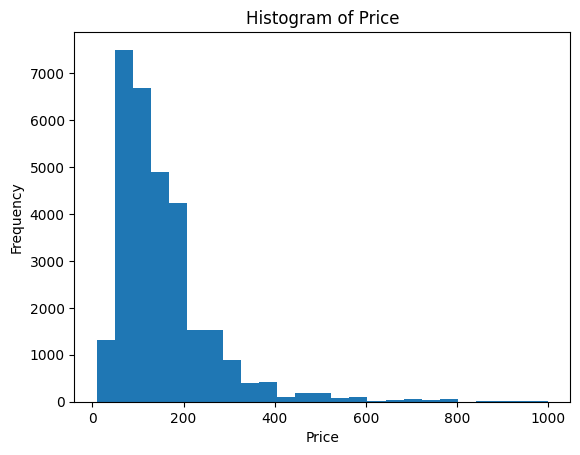

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/DS 3001/airbnb_hw.csv')
df_clean = df.copy()
df_clean.head() #There are 13 variables, in a variety of different topics that talk about the airbnb listings
len(df_clean) #There are 30478 entries into this csv

pd.crosstab(df_clean['Room Type'], df_clean['Property Type']) #Private rooms are much more common in the apartment, or house. Also the majority of entries across private, entire, and shared are in apartment, house, or lofts

df_clean['Price'] = pd.to_numeric(df_clean['Price'], errors='coerce')
df_clean['Price'].hist(bins = 25, grid = False)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()

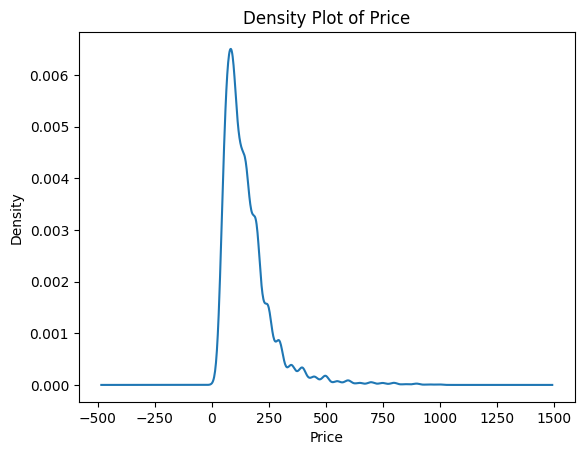

In [7]:
df_clean['Price'].plot.density()
#The data is poorly scaled and does not provide much information other than a sharp peak on the Kernel Density Plot
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Density Plot of Price')
plt.show()

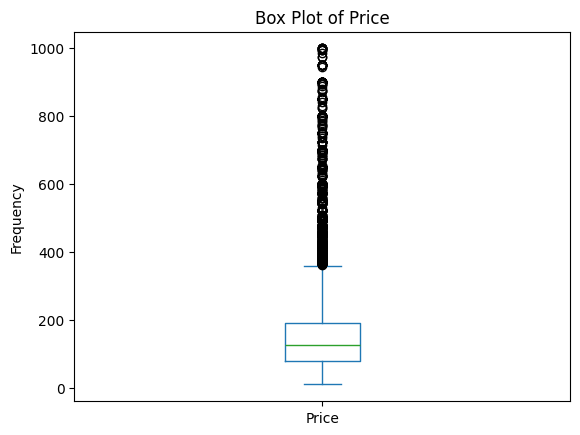

In [10]:
df_clean['Price'].plot.box() #From this plot we can determine there are a lot of outliers within this data set
plt.ylabel('Frequency')
plt.title('Box Plot of Price')
plt.show()

In [ ]:
df_clean['Price'].describe()

,Price
count,30297.000000
mean,153.357032
std,108.895698
min,10.000000
25%,80.000000
50%,125.000000
75%,192.000000
max,999.000000


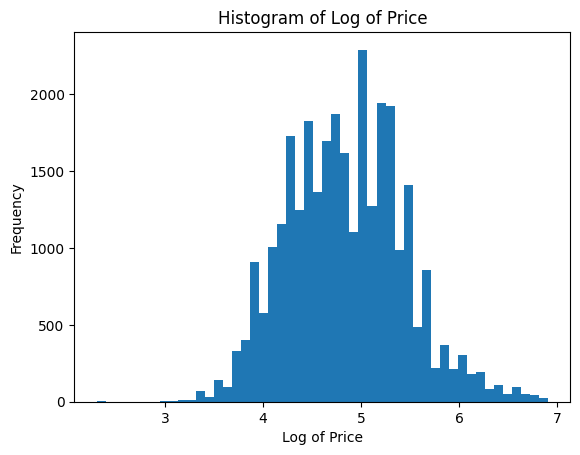

In [11]:
df_clean['price_log'] = np.log(df_clean['Price'])
df_clean['price_log'].hist(bins = 50, grid = False)
plt.xlabel('Log of Price')
plt.ylabel('Frequency')
plt.title('Histogram of Log of Price')
plt.show()

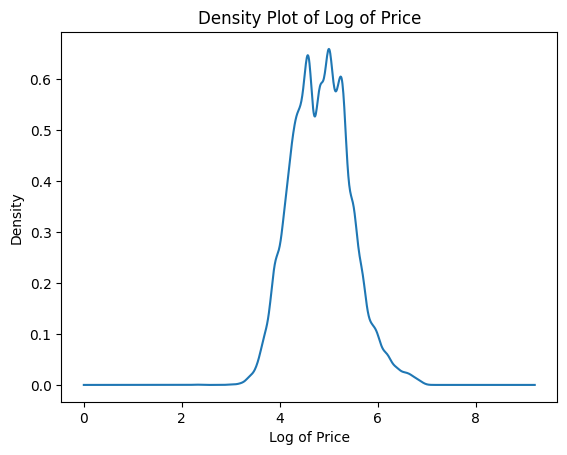

In [12]:
df_clean['price_log'].plot.density()
plt.xlabel('Log of Price')
plt.ylabel('Density')
plt.title('Density Plot of Log of Price')
plt.show()

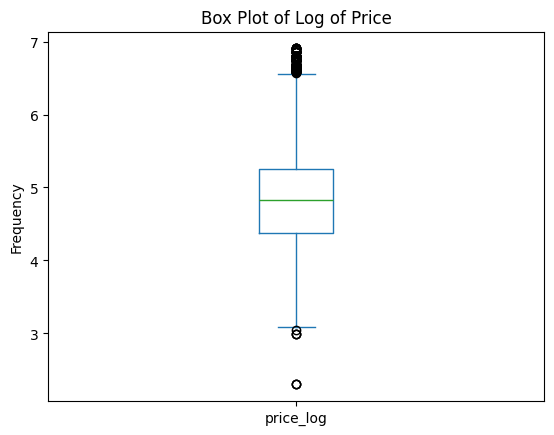

In [13]:
df_clean['price_log'].plot.box()
plt.ylabel('Frequency')
plt.title('Box Plot of Log of Price')
plt.show()

In [ ]:
df_clean['price_log'].describe()

,price_log
count,30297.000000
mean,4.845370
std,0.596999
min,2.302585
25%,4.382027
50%,4.828314
75%,5.257495
max,6.906755


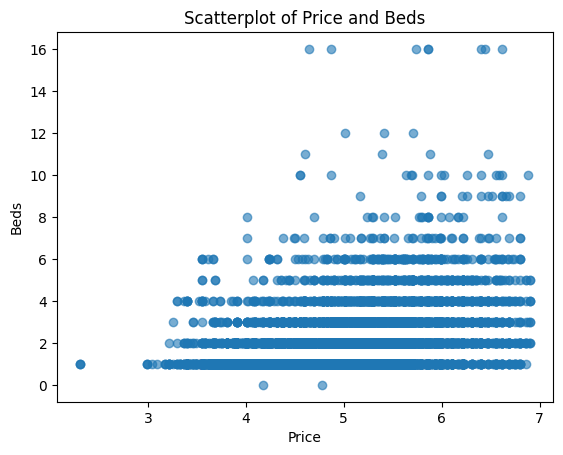

,count,mean,std,min,25%,50%,75%,max
Beds,,,,,,,,
0.0,2.0,92.000000,38.183766,65.0,78.50,92.0,105.50,119.0
1.0,20307.0,124.757670,75.685752,10.0,75.00,100.0,155.00,950.0
2.0,6561.0,186.702332,115.044205,25.0,115.00,160.0,225.00,999.0
3.0,2029.0,234.928043,142.288189,26.0,140.00,200.0,299.00,999.0
4.0,766.0,280.554830,175.512312,27.0,150.00,240.0,363.75,999.0
5.0,274.0,322.000000,190.319415,35.0,186.00,285.0,425.00,995.0
6.0,166.0,316.313253,201.157585,35.0,183.75,271.0,399.00,900.0
7.0,45.0,341.377778,220.116631,55.0,177.00,300.0,445.00,900.0
8.0,20.0,331.850000,155.652202,55.0,218.75,339.5,408.75,750.0


In [14]:
plt.scatter(df_clean['price_log'], df_clean['Beds'], alpha = 0.6)
plt.xlabel('Price')
plt.ylabel('Beds')
plt.title('Scatterplot of Price and Beds')
plt.show() #From this plot it doesn't seem to provide much information because there is a wide range of price for the same number of beds, providing a linear plot with no correlation

df_clean.groupby('Beds')['Price'].describe() #Depending on the number of beds there is a notable difference between the averages of the prices, however, when looking at the standard deviations, this goes away due to the large variance seen within the data set, that sets up the prices to be very similar regardless of the number of beds



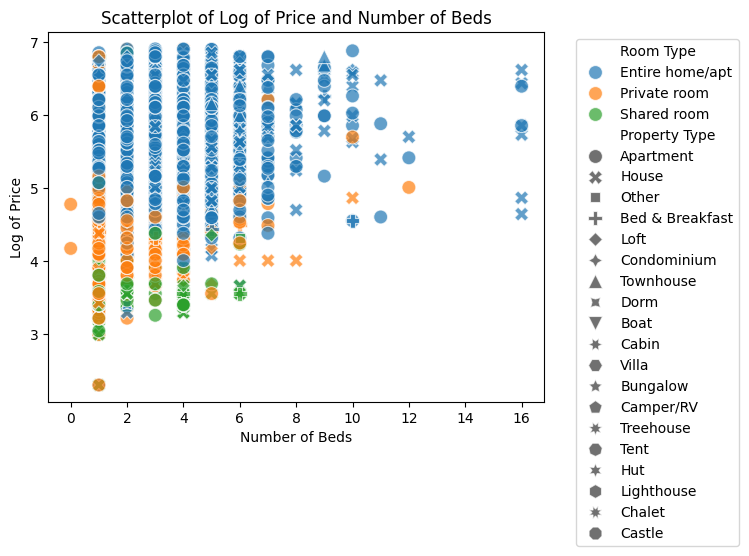

count        mean         std    min  \
Room Type       Property Type                                             
Entire home/apt Apartment        15550.0  200.210161  109.967435   10.0   
                Bed & Breakfast     13.0  184.538462  119.814172   85.0   
                Boat                 7.0  158.428571   51.110524  100.0   
                Bungalow             4.0  150.750000   46.464144   87.0   
                Cabin                1.0  250.000000         NaN  250.0   
                Camper/RV            6.0  114.333333  107.685963   45.0   
                Condominium         71.0  281.126761  175.313998   80.0   
                Dorm                 4.0   44.250000   24.060687   30.0   
                House              723.0  234.554633  159.785974   27.0   
                Lighthouse           1.0   39.000000         NaN   39.0   
                Loft               379.0  284.910290  184.515517   55.0   
                Other               10.0  290.800000  273.526273   66.0   
                Townhouse           81.0  242.037037  166.755243   66.0   
                Villa                3.0  206.333333   89.667906  120.0   
Private room    Apartment        10741.0   91.605903   46.356168   10.0   
                Bed & Breakfast    155.0   97.161290   47.031971   32.0   
                Boat                 1.0  120.000000         NaN  120.0   
                Cabin                1.0   80.000000         NaN   80.0   
                Camper/RV            1.0   39.000000         NaN   39.0   
                Castle               1.0  150.000000         NaN  150.0   
                Chalet               1.0   99.000000         NaN   99.0   
                Condominium         22.0   98.590909   40.576394   46.0   
                Dorm                16.0   86.562500   40.738137   50.0   
                House             1258.0   77.750397   49.402650   25.0   
                Hut                  2.0   75.000000   35.355339   50.0   
                Loft               310.0   99.077419   63.875489   39.0   
                Other               28.0  176.642857  141.484252   39.0   
                Tent                 4.0  126.250000   94.989034   40.0   
                Townhouse           52.0   83.365385   30.578109   45.0   
                Treehouse            1.0   95.000000         NaN   95.0   
                Villa                4.0  126.250000   71.107313   60.0   
Shared room     Apartment          684.0   77.853801   57.875888   20.0   
                Bed & Breakfast     12.0  143.666667  245.328104   30.0   
                Dorm                11.0   73.181818   46.328864   30.0   
                House               79.0   46.822785   25.152743   10.0   
                Loft                49.0   78.816327   87.521824   30.0   
                Other                4.0  148.750000  134.806961   70.0   
                Townhouse            1.0   95.000000         NaN   95.0   
                Treehouse            3.0  167.666667  114.788211   95.0   

                                    25%    50%     75%    max  
Room Type       Property Type                                  
Entire home/apt Apartment        135.00  175.0  230.00  999.0  
                Bed & Breakfast  121.00  130.0  220.00  525.0  
                Boat             122.50  150.0  182.00  250.0  
                Bungalow         133.50  160.5  177.75  195.0  
                Cabin            250.00  250.0  250.00  250.0  
                Camper/RV         49.00   74.0  114.00  325.0  
                Condominium      155.00  200.0  360.00  850.0  
                Dorm              30.00   33.5   47.75   80.0  
                House            125.00  188.0  299.00  950.0  
                Lighthouse        39.00   39.0   39.00   39.0  
                Loft             160.00  220.0  350.00  985.0  
                Other            123.75  177.5  350.00  850.0  
                Townhouse        135.00  189.0  295.00  900.0  

In [15]:
sns.scatterplot( #The patterns I can visualize is that the entire home/apt listing tend to have a higher price than that of a private room or even shared room. Also the largest bed rooms are those that are entire homes
    data=df_clean,
    x='Beds',
    y='price_log',
    hue='Room Type',
    style='Property Type',
    alpha=0.7,
    s=100
)

plt.xlabel('Number of Beds')
plt.ylabel('Log of Price')
plt.title('Scatterplot of Log of Price and Number of Beds')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

df_clean.groupby(['Room Type', 'Property Type'])['Price'].describe() #On average the entire home/apt that is categorizes other has the highest average price at 290.8.
#Although the highest average this room/property type also has the largest standard deviation at 273.
#With the large standard deviation in most of the properties and room types I think the median is better measurement for the central tendency because it is less sensitive to the introduction of outliers, as is for the mean. This means that overall there will be a more consistent value.



**Q3.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

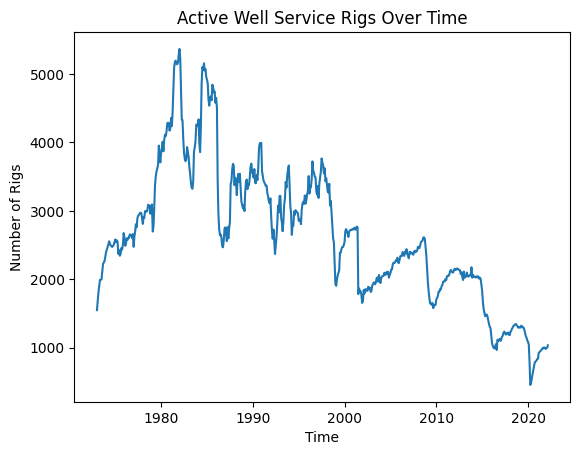

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/DS 3001 (1)/drilling_rigs.csv')
df2_clean = df2.copy()
df2_clean.head() #There are 10 variables, some of the data will need to be coerced due to them being not available, in order to make the values be able to be used numerically.
#By utilizing np.nan the two variables that have this missing data can be cleaned to take the not available values and coerce them to NaN and then the rest of the data can be utilized numerically.
len(df2_clean) #There are 623 observations in this data set

df2_clean['time'] = pd.to_datetime(df2_clean['Month'], format ='mixed')
df2_clean.head()
df2_clean['Active Well Service Rig Count (Number of Rigs)'] = pd.to_numeric(df2_clean['Active Well Service Rig Count (Number of Rigs)'], errors='coerce')


plt.plot(df2_clean['time'], df2_clean['Active Well Service Rig Count (Number of Rigs)'], linestyle='-')
#From this plot it can be deduced that the number of Active Well Service Rigs spiked around the mid 1980s, and since then has been on a decline, with local jumps of higher usage, but overall on a decline.

plt.xlabel('Time')
plt.ylabel('Number of Rigs')
plt.title('Active Well Service Rigs Over Time')
plt.show()

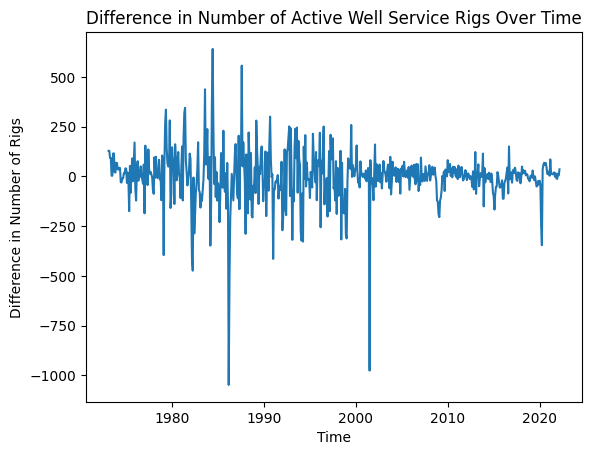

In [ ]:
df2_clean = df2_clean.dropna(subset=['time', 'Active Well Service Rig Count (Number of Rigs)'])
df2_clean['Rig_Count_Change'] = df2_clean['Active Well Service Rig Count (Number of Rigs)'].diff()
plt.plot(df2_clean['time'], df2_clean['Rig_Count_Change'], linestyle='-') #This plot shows us that overtime there has been an overall steady decrease or increase in the number of oil rigs, except for around late 1980s and early 2000s where there were sharp declines in the number of active well rigs.

plt.xlabel('Time')
plt.ylabel('Difference in Number of Rigs')
plt.title('Difference in Number of Active Well Service Rigs Over Time')
plt.show()

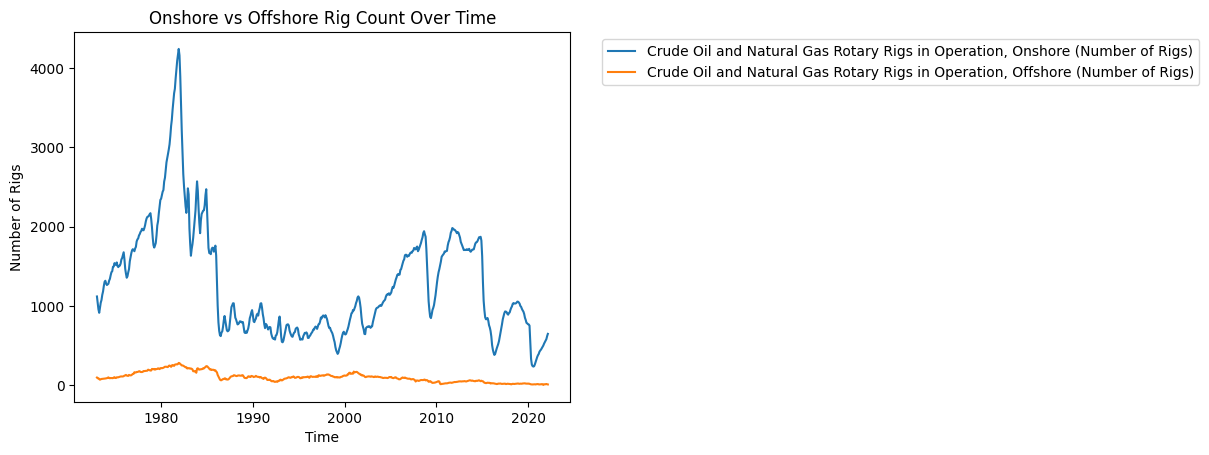

In [ ]:
df_melted = pd.melt(
    df2_clean,
    id_vars=['time'],
    value_vars=['Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'],
    var_name='Rig_Type',
    value_name='Rig_Count'
)

sns.lineplot(
    data=df_melted,
    x='time',
    y='Rig_Count',
    hue='Rig_Type',
)
plt.xlabel('Time')
plt.ylabel('Number of Rigs')
plt.title('Onshore vs Offshore Rig Count Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
